In [35]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

In [36]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [37]:
file_path ="./ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # utf-8
ori.columns = ["category","date", "internet", "mobile"]
ori.tail()

,category,date,internet,mobile
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.10,68403,128216
2206,기타,2024.11 p),73246,135527
2207,기타,2024.12 p),75613,144134


In [38]:
print("수정전")
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x: x.strip(' p)'))
print("수정후")
print(ori['date'].tail())

수정전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정후
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [39]:
ori['date'] = pd.to_datetime(ori["date"], format='%Y.%m')
ori.dtypes
ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-10-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


In [42]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category']== '음식서비스'] 
obj = ['농축수산물']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
1229,농축수산물,2023-06-01,210887,612983
1224,농축수산물,2023-01-01,285794,784252
1167,농축수산물,2018-04-01,71138,144262
1170,농축수산물,2018-07-01,74924,149306
1163,농축수산물,2017-12-01,75792,146060


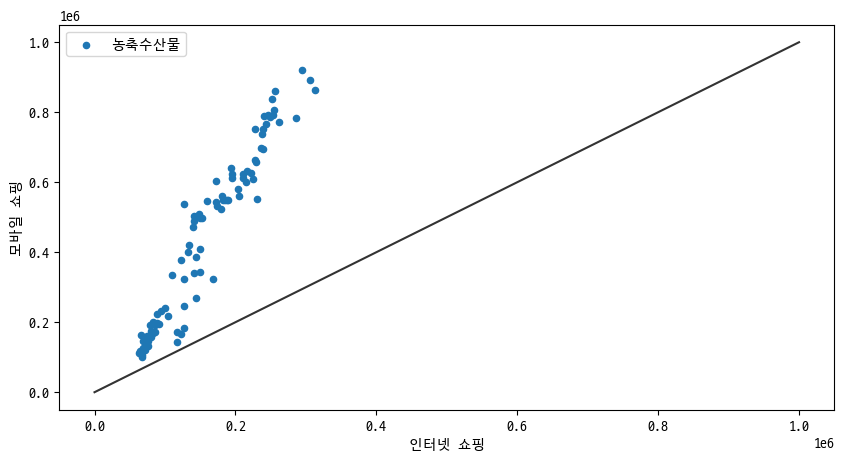

In [43]:
fig , ax = plt.subplots(figsize=(10,5))
category = obj

for cate in category:
    category_data = ex1_data[ex1_data['category'] ==cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data , y_data, s = 20, label = cate)
    
ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc="best")
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.8)
plt.show()

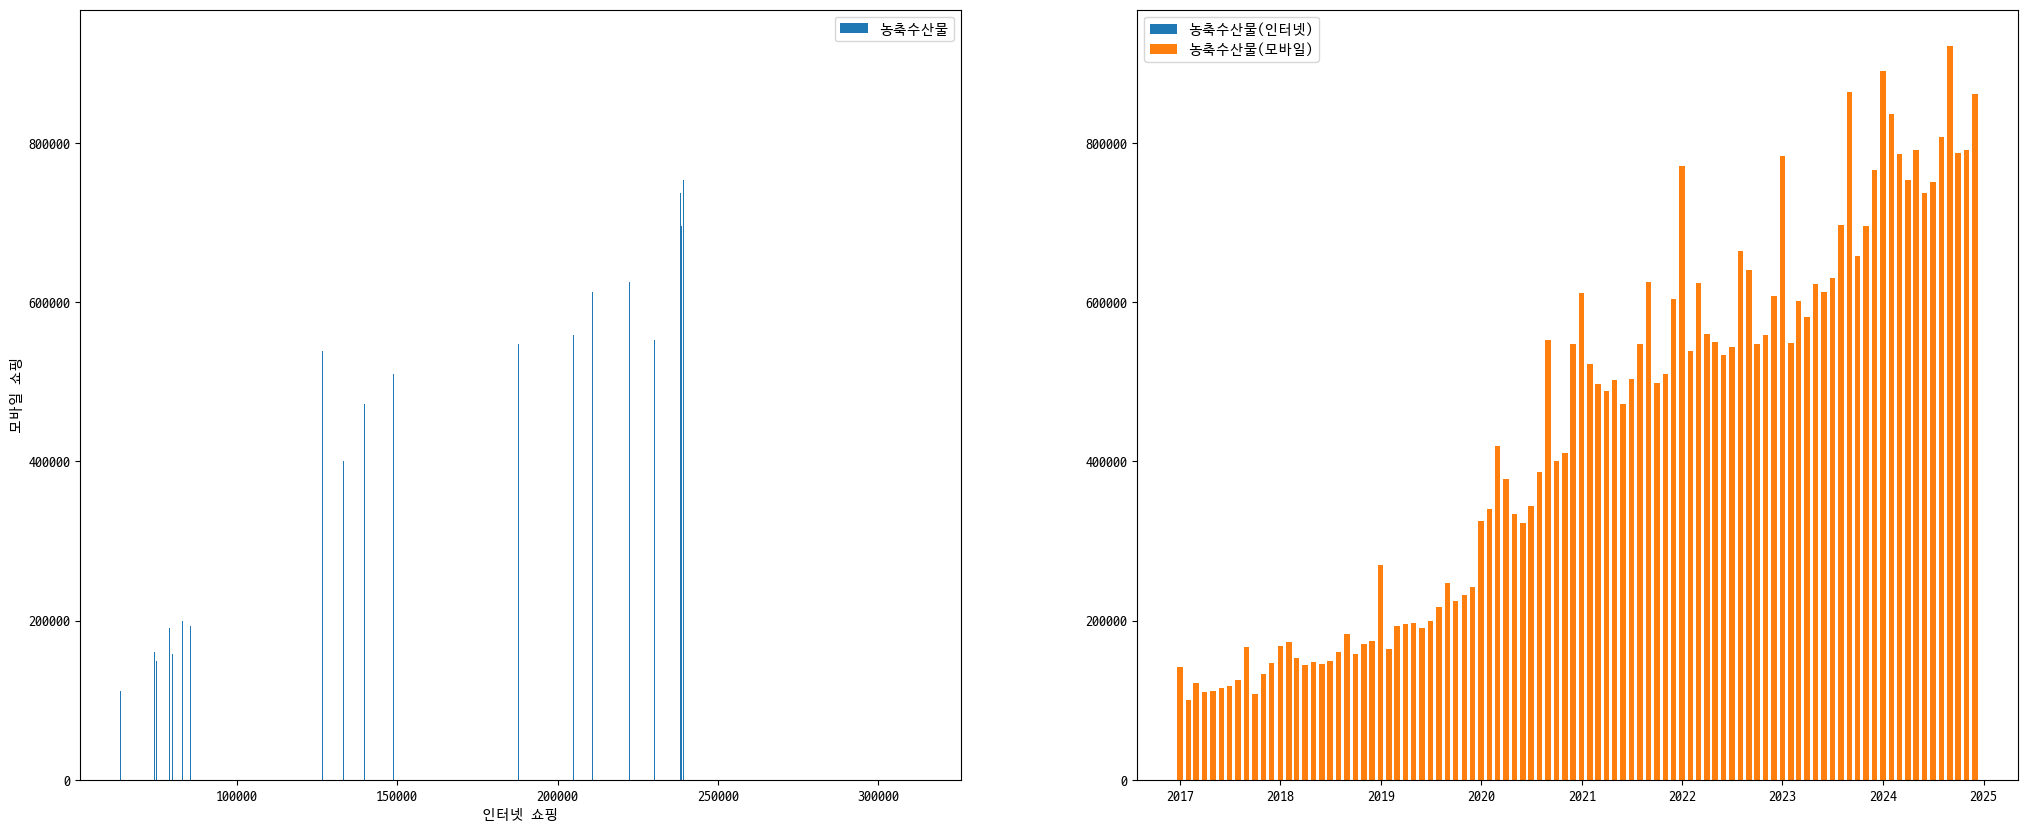

In [44]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
category = obj 

for cate in category:
    category_data = ex1_data[ex1_data['category'] ==cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax[0].bar(x_data, y_data, width = 100, label = cate)

ax[0].set_xlabel("인터넷 쇼핑")
ax[0].set_ylabel("모바일 쇼핑")
ax[0].legend(loc="best")

tdata = category_data['date']
second = ex1_data[ex1_data['category']==obj[0]]
idata = second['internet']
mdata = second['mobile']

ax[1].bar(tdata, idata, width=20 , label = obj[0]+ '(인터넷)')
ax[1].bar(tdata, mdata, width=20, label = obj[0]+ '(모바일)')
ax[1].legend()

plt.show()